In [ ]:
'''
Implement a few basic models using TensorFlow

    

'''

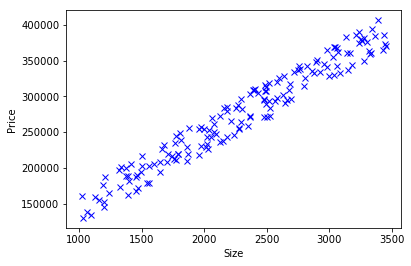

In [7]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# allows plots to show in results cell
%matplotlib inline

# Generate random house sizes between 1000 and 3500 sqft
num_houses = 160
np. random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_houses)

# Generate random house prices from house size with random noise added
house_price = house_size * 100 + np.random.randint(low=20000, high=70000, size=num_houses)

# Plot generated houses (price vs size)
plt.plot(house_size, house_price, "bx")  # bx = blue x's
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

In [16]:
# Normalizing function used to prevent numerical overflow
def normalize(npArray):
    return (npArray - npArray.mean()) / npArray.std()

num_train_samples = math.floor(num_houses * 0.7)

# Define training data
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asarray(house_price[:num_train_samples])
train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

# Define test data
test_house_size = np.asarray(house_size[num_train_samples:])
test_price = np.asarray(house_price[num_train_samples:])
test_house_size_norm = normalize(test_house_size)
test_price_norm = normalize(test_price)

In [17]:
# Setup the TensorFlow placeholders that get updated as we descend down the gradient
#   name parameter sets the name of the operation in the computation graph
tf_house_size = tf.placeholder('float', name='house_size')
tf_price = tf.placeholder('float', name='price')

# Define variables that will represent price and size, whose value will change during training
# Intialize variables to some random value
tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")

# Define operations used to predict house prices based on size
#   ((size_factor * house_size) + price_offset)
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)

# Define Loss Function (mean squared error)
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred-tf_price,2))/(2*num_train_samples)

# Set learning rate parameter for optimizer
learning_rate = 0.1

# Define gradient descent optimizer that will minimize the loss defined in the operation "cost"
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

iteration #: 0002 cost= 1.335204720 size_factor= 0.673309 price_offset= -1.59164
iteration #: 0004 cost= 0.902258277 size_factor= 0.728296 price_offset= -1.30302
iteration #: 0006 cost= 0.612112463 size_factor= 0.773302 price_offset= -1.06675
iteration #: 0008 cost= 0.417660445 size_factor= 0.81014 price_offset= -0.87335
iteration #: 0010 cost= 0.287336767 size_factor= 0.840292 price_offset= -0.715034
iteration #: 0012 cost= 0.199988559 size_factor= 0.864971 price_offset= -0.585439
iteration #: 0014 cost= 0.141441301 size_factor= 0.88517 price_offset= -0.479354
iteration #: 0016 cost= 0.102195926 size_factor= 0.901704 price_offset= -0.392514
iteration #: 0018 cost= 0.075886868 size_factor= 0.915238 price_offset= -0.321429
iteration #: 0020 cost= 0.058248300 size_factor= 0.926314 price_offset= -0.263239
iteration #: 0022 cost= 0.046421263 size_factor= 0.93538 price_offset= -0.215606
iteration #: 0024 cost= 0.038489901 size_factor= 0.9428 price_offset= -0.176614
iteration #: 0026 cost= 0

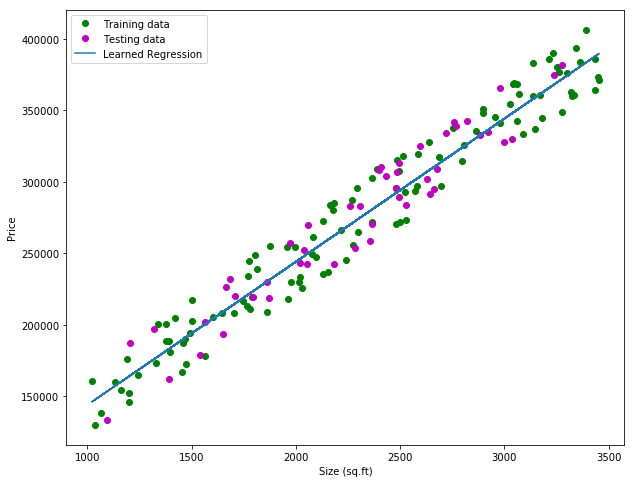

NameError: name 'fit_plot_idx' is not defined

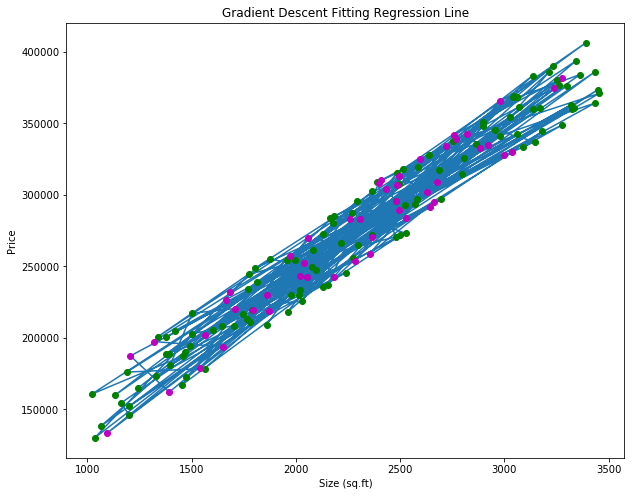

In [24]:
# Initialize the variables
init = tf.global_variables_initializer()

# Launch graph in a session
with tf.Session() as sess:
    sess.run(init)
    
    # set how often to display training progress
    display_every = 2
    num_training_iter = 50
    
    # iterate through training data
    for iteration in range(num_training_iter):
        # fit all training data
        for (x,y,) in zip(train_house_size_norm, train_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size: x, tf_price: y})
    
        if (iteration + 1) % display_every == 0:
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
            print("iteration #:", '%04d' % (iteration + 1), "cost=", '{:.9f}'.format(c), "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))

    print("Optimization complete!")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
    
    # get values used to normalized data so we can denormalize data back to its original scale
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()

    train_price_mean = train_price.mean()
    train_price_std = train_price.std()

    # Plot the graph
    plt.rcParams["figure.figsize"] = (10,8)
    plt.figure()
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label='Training data')
    plt.plot(test_house_size, test_price, 'mo', label='Testing data')
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
             (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,
             label='Learned Regression')

    plt.legend(loc='upper left')
    plt.show()
    

    # 
    # Plot another graph that animation of how Gradient Descent sequentually adjusted size_factor and price_offset to 
    # find the values that returned the "best" fit line.
    fig, ax = plt.subplots()
    line, = ax.plot(house_size, house_price)

    plt.rcParams["figure.figsize"] = (10,8)
    plt.title("Gradient Descent Fitting Regression Line")
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label='Training data')
    plt.plot(test_house_size, test_price, 'mo', label='Testing data')

    def animate(i):
        line.set_xdata(train_house_size_norm * train_house_size_std + train_house_size_mean)  # update the data
        line.set_ydata((fit_size_factor[i] * train_house_size_norm + fit_price_offsets[i]) * train_price_std + train_price_mean)  # update the data
        return line,
 
     # Init only required for blitting to give a clean slate.
    def initAnim():
        line.set_ydata(np.zeros(shape=house_price.shape[0])) # set y's to 0
        return line,

    ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, fit_plot_idx), init_func=initAnim,
                                 interval=1000, blit=True)

    plt.show()   